In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt   #Data visualisation libraries 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv('Versuch_7.csv', header=0, index_col=0)

In [3]:
df.shape

(376, 11)

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11
0,1.000,1.000,1.032,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000
1,1.000,1.032,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017
2,1.032,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017,1.000
3,1.000,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017,1.000,1.017
4,1.014,0.848,1.000,0.986,1.000,1.000,1.000,1.017,1.000,1.017,1.000


In [5]:
df.columns.tolist()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 375
Data columns (total 11 columns):
1     376 non-null float64
2     376 non-null float64
3     376 non-null float64
4     376 non-null float64
5     376 non-null float64
6     376 non-null float64
7     376 non-null float64
8     376 non-null float64
9     376 non-null float64
10    376 non-null float64
11    376 non-null float64
dtypes: float64(11)
memory usage: 35.2 KB


In [7]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,1.018524,1.018364,1.018862,1.018854,1.018931,1.019391,1.019742,1.020239,1.020354,1.020628,1.020705
std,0.092545,0.092629,0.093031,0.093030,0.093027,0.093429,0.093031,0.093424,0.093408,0.093499,0.093494
min,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000,0.842000
25%,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000,0.940000
50%,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000,1.017000
75%,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000,1.037000
max,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000,1.198000


In [8]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'], dtype='object')

In [9]:
#sns.pairplot(df)

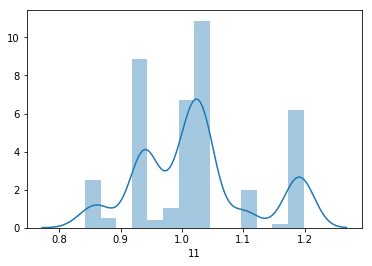

In [40]:
sns.distplot(df['11'])

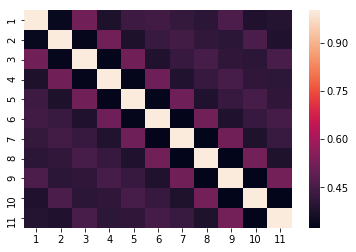

In [11]:
sns.heatmap(df.corr())

In [13]:
X = df[['1','2','3','4','5','6','7','8','9','10']].values
y = df['11'].values

In [14]:
#
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101, shuffle=True)

In [15]:
#train_test_split(y, shuffle=True)

In [16]:
lm.fit(X_train,y_train)
#lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
df.values

array([[1.   , 1.   , 1.032, ..., 1.   , 1.   , 1.   ],
       [1.   , 1.032, 1.   , ..., 1.   , 1.   , 1.017],
       [1.032, 1.   , 1.014, ..., 1.   , 1.017, 1.   ],
       ...,
       [1.187, 1.029, 1.187, ..., 0.98 , 1.187, 1.029],
       [1.029, 1.187, 0.94 , ..., 1.187, 1.029, 1.103],
       [1.187, 0.94 , 1.187, ..., 1.029, 1.103, 1.029]])

In [55]:
coeff_df = pd.DataFrame({'Attributes': df.columns.values(), 'Coefficients': lm.coef_()})

TypeError: 'numpy.ndarray' object is not callable

In [17]:
#make predctions on the test data
y_pred = lm.predict(X_test)
#predictions = lm.predict(X)

In [35]:
y_pred

array([0.96549763, 0.9794353 , 0.96279202, 0.95987306, 1.13077782,
       0.96486876, 0.92864862, 0.97464647, 0.91532458, 0.96201071,
       1.14445971, 0.95735396, 1.13470528, 1.03853828, 1.09811382,
       1.15021513, 1.00137933, 0.97521221, 1.0068328 , 0.97060196,
       0.97920357, 1.07484447, 0.95213107, 0.9854124 , 0.96522872,
       0.95609444, 0.9421515 , 0.92865457, 1.12808914, 0.9713593 ,
       0.9783936 , 1.11163711, 1.1144505 , 1.12372184, 0.97176485,
       1.08520915, 1.07369001, 1.03036254, 0.97366688, 1.1238566 ,
       0.98250768, 1.05124723, 0.945753  , 0.96045198, 1.02112154,
       1.12259348, 1.12060184, 1.15095271, 0.99990604, 0.98510331,
       1.0563536 , 1.11613366, 1.07099271, 0.94679448, 0.95430144,
       1.08708342, 0.96314386, 1.07025076, 0.96193466, 1.10616489,
       1.00263423, 0.97116205, 1.00441124, 1.09368637, 1.07463759,
       0.9727612 , 1.00906493, 0.96846866, 1.04683016, 0.96136462,
       1.0554236 , 1.1329366 , 0.97014202, 1.09983299, 1.13371

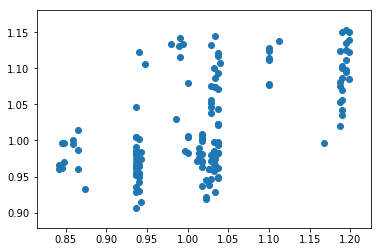

In [36]:
plt.scatter(y_test,y_pred)
#plt.scatter(y,predictions)

In [37]:
print("This is the actual price: ", y_test[:1])
print("This is the predicted price: ", y_pred[:1])

This is the actual price:  [0.842]
This is the predicted price:  [0.96549763]


In [38]:
#.values for series object to call function flatten()
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predictions': y_pred.flatten()})
comparison

,Actual,Predictions
0,0.842,0.965498
1,0.937,0.979435
2,1.017,0.962792
3,0.842,0.959873
4,0.989,1.130778
5,0.940,0.964869
6,0.937,0.928649
7,0.943,0.974646
8,0.943,0.915325
9,0.845,0.962011


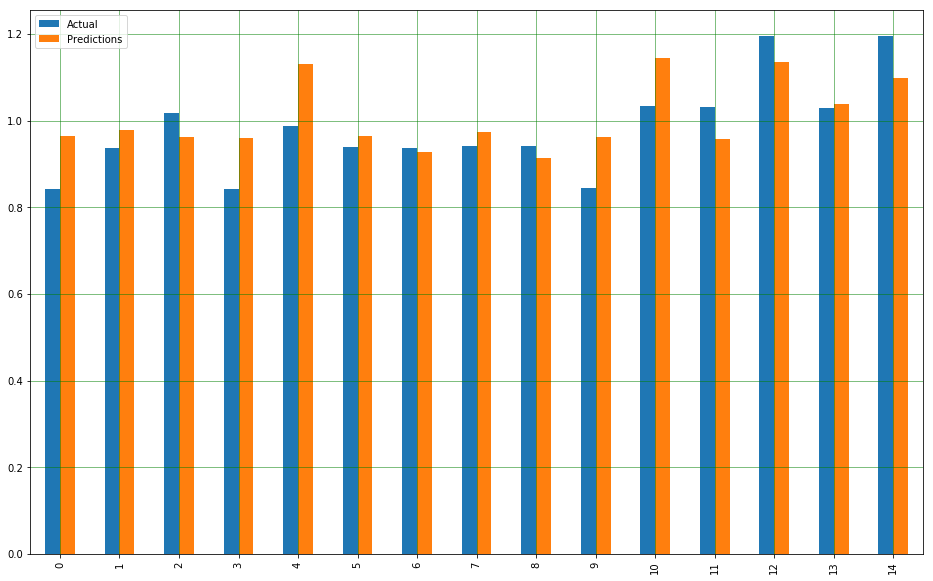

In [39]:
df1 = comparison.head(15)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

ValueError: x and y must be the same size

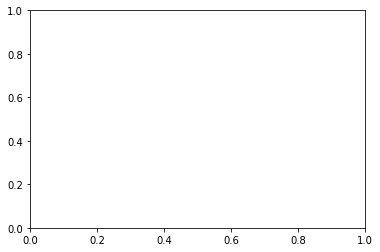

In [28]:
plt.scatter(X_test, y_pred, color='red')
plt.show()

In [29]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print('Slope:' , lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean absolute error', mae)
print('Mean squared error', mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.01116207  0.12505805  0.11785398  0.0759258   0.12422721  0.1672087
 -0.03048867  0.0536681   0.30213053  0.0026878 ]
Intercept: 0.052031572782792246
Mean absolute error 0.06318350711983033
Mean squared error 0.005958120863132145
Root mean squared error:  0.07718886489081275
R2 score:  0.31881777519397847


ValueError: x and y must be the same size

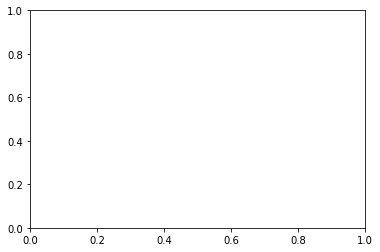

In [32]:
plt.scatter(X, y, s=10)
plt.xlable('x')
plt.ylabel('y')

ValueError: x and y must have same first dimension, but have shapes (376, 10) and (151,)

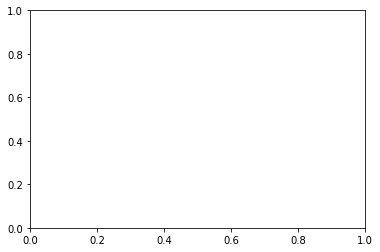

In [66]:
plt.plot(X, y_pred, color='r')
plt.show()